<a href="https://colab.research.google.com/github/Hemasri20/programming-java/blob/master/Copy_of_modified_ovarian_cancer_project25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***

In [ ]:
import numpy as np
import sys
np.set_printoptions(threshold=10)
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Load the dataset***

In [37]:
#dataset=pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer_Project-main/Ovarian_Cancer_Project-main/ovariantotal.csv')
df=pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer_Project-main/Ovarian_Cancer_Project-main/ovariantotal.csv')
df.head()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47,45.4,56,11,24,0.01,0.30,5.35,...,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,34.24,23.98,61,39.9,95,9,13,0.02,0.30,3.21,...,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
2,1.50,18.40,39,45.4,77,9,18,0.03,0.60,3.80,...,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
3,2.75,16.60,45,39.2,26,16,17,0.05,0.74,5.27,...,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
4,2.36,19.97,45,35.0,47,21,27,0.01,0.10,4.89,...,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['TYPE'], axis=1),
    df['TYPE'],
    test_size=0.2,
    random_state=1)

In [ ]:
X_train.head() 
X_train.shape

(279, 49)

In [ ]:
X_test.head()
X_test.shape

(70, 49)

In [ ]:
y_train.head()  
y_train.shape

(279,)

In [ ]:
y_test.shape


(70,)

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(49,49))
corr = pd.DataFrame(df).corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,1.000000,-0.075975,0.213769,-0.206773,-0.064842,0.108320,0.117043,0.222841,0.015173,-0.071301,0.211393,-0.022086,0.063697,0.292641,-0.014703,-0.088378,-0.053768,0.115254,0.063150,0.012694,0.111589,0.121900,-0.056077,-0.020513,-0.114477,0.090443,0.136456,0.095678,-0.117175,-0.292756,0.239100,-0.026333,0.188415,0.146195,-0.110847,-0.107606,-0.059222,-0.033759,-0.153567,-0.104793,0.292443,0.066845,-0.048723,-0.112442,0.036476,0.162016,0.037539,0.023106,-0.262733
1,-0.075975,1.000000,0.156380,0.275690,0.058243,-0.310208,0.077219,0.156541,-0.030980,0.116967,-0.013397,-0.126846,-0.000723,0.097514,-0.365460,0.096923,0.088737,0.102744,0.300924,-0.204950,-0.094598,-0.031560,-0.124270,0.047279,-0.165762,-0.313407,-0.219678,-0.156454,-0.019493,-0.001255,-0.015625,0.188902,0.035941,0.072942,0.304059,0.131407,0.157256,0.134495,0.120203,-0.121867,-0.164123,-0.044910,-0.127610,0.016661,0.077612,0.116183,0.119794,0.124997,-0.045755
2,0.213769,0.156380,1.000000,-0.092805,0.303717,-0.039829,-0.048901,-0.119190,-0.189646,0.157163,-0.124803,0.099631,-0.000420,0.025390,-0.016989,0.139412,-0.023216,0.123741,0.030749,-0.047207,0.022154,-0.005740,-0.166078,0.203488,-0.053868,-0.155164,-0.040797,-0.127695,-0.064321,-0.143445,0.108557,0.132421,-0.237254,-0.138888,-0.152941,0.291154,-0.061124,0.036875,0.151033,-0.105895,0.210961,-0.038242,0.240940,-0.127309,-0.008630,0.108109,0.260896,-0.105820,0.091062
3,-0.206773,0.275690,-0.092805,1.000000,-0.052080,0.080007,-0.125103,0.079370,-0.188296,0.015376,-0.244826,0.136862,-0.123333,0.028588,0.114238,-0.023630,0.080973,0.016953,-0.046054,0.151837,0.026703,-0.001000,-0.116446,0.204831,0.130163,-0.123332,-0.312097,-0.098327,-0.049652,-0.159945,-0.187964,0.101462,0.181820,-0.265069,-0.165342,0.061065,-0.023053,-0.086369,0.079228,-0.038427,0.054780,-0.299747,0.043239,-0.249068,-0.157858,0.097988,-0.052828,0.057817,-0.062840
4,-0.064842,0.058243,0.303717,-0.052080,1.000000,0.298441,-0.100231,-0.034928,-0.017662,-0.023436,-0.292984,-0.073397,-0.257827,-0.158244,0.116888,-0.048591,0.039039,-0.055932,0.136774,-0.220574,-0.128078,-0.309576,-0.218706,0.118437,0.096878,-0.101709,-0.028014,-0.298704,-0.079563,0.004830,0.050207,0.008361,-0.133776,-0.074914,-0.159287,0.281919,-0.252714,-0.124075,0.248337,0.154048,0.050095,-0.085200,0.137697,-0.042419,-0.106305,-0.031994,0.136439,-0.319932,0.136294
5,0.108320,-0.310208,-0.039829,0.080007,0.298441,1.000000,0.119716,0.296606,-0.047927,0.035237,0.068084,0.068699,-0.064998,-0.148872,0.297338,-0.041723,0.052530,-0.134038,-0.035010,0.143331,-0.103150,-0.070947,0.081847,0.080640,0.176912,0.017896,0.029004,0.076432,0.057656,-0.173611,0.097992,0.021007,0.133995,0.043393,-0.305581,0.023688,-0.044282,-0.135667,0.109027,-0.048674,0.248421,-0.292901,0.217877,-0.275165,-0.011954,0.061963,0.124481,-0.083202,-0.008362
6,0.117043,0.077219,-0.048901,-0.125103,-0.100231,0.119716,1.000000,0.087762,-0.089406,-0.001959,0.018515,-0.063065,0.074794,0.185661,-0.069455,-0.197036,0.063310,0.080489,0.162042,-0.057531,-0.034446,0.013103,0.050068,-0.300493,-0.295127,0.281420,0.167403,0.108598,-0.061843,-0.123758,0.295996,0.244742,-0.007904,0.104712,0.058086,-0.017109,-0.248545,0.258056,-0.094522,-0.039518,-0.038861,0.096114,0.005112,0.049511,0.254020,0.088695,0.124783,0.124689,0.210642
7,0.222841,0.156541,-0.119190,0.079370,-0.034928,0.296606,0.087762,1.000000,0.150376,0.078032,-0.037825,0.101280,-0.081926,-0.098330,-0.003680,-0.180411,-0.170987,-0.126016,0.152936,0.243083,0.025761,-0.110084,0.094328,0.016335,0.113215,0.093648,0.026120,-0.139029,0.148127,-0.215140,-0.103688,0.059790,0.049550,0.028059,-0.029156,-0.000956,0.158077,0.161293,-0.104624,-0.118962,-0.071121,0.101728,0.031960,-0.057365,0.063425,0.330933,-0.044257,0.046515,-0.247492
8,0.015173,-0.030980,-0.189646,-0.188296,-0.017662,-0.047927,-0.089406,0.150376,1.000000,0.192016,0.018059,-0.159106,-0.095211,

In [39]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.06395489, 0.        , 0.17290401, ..., 0.00697646, 0.02802414,
       0.        ])

In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

HE4          0.352804
NEU          0.256277
CA125        0.225010
Age          0.172904
Menopause    0.125663
LYM%         0.097742
Na           0.085632
CEA          0.083499
ALB          0.068104
ALP          0.065188
PLT          0.064922
AFP          0.063955
CA19-9       0.058285
MONO#        0.052239
CL           0.038589
GLO          0.038388
AST          0.032207
PDW          0.030567
TP           0.028024
EO#          0.027566
PCT          0.027061
HGB          0.024020
GLU.         0.023276
RDW          0.022633
CA72-4       0.022009
MONO%        0.018549
TBIL         0.006976
K            0.006350
ALT          0.006248
CO2CP        0.006105
LYM#         0.002566
MCH          0.002137
PHOS         0.000000
RBC          0.000000
MPV          0.000000
HCT          0.000000
Mg           0.000000
MCV          0.000000
IBIL         0.000000
AG           0.000000
GGT          0.000000
EO%          0.000000
DBIL         0.000000
CREA         0.000000
Ca           0.000000
BUN       

<AxesSubplot:>

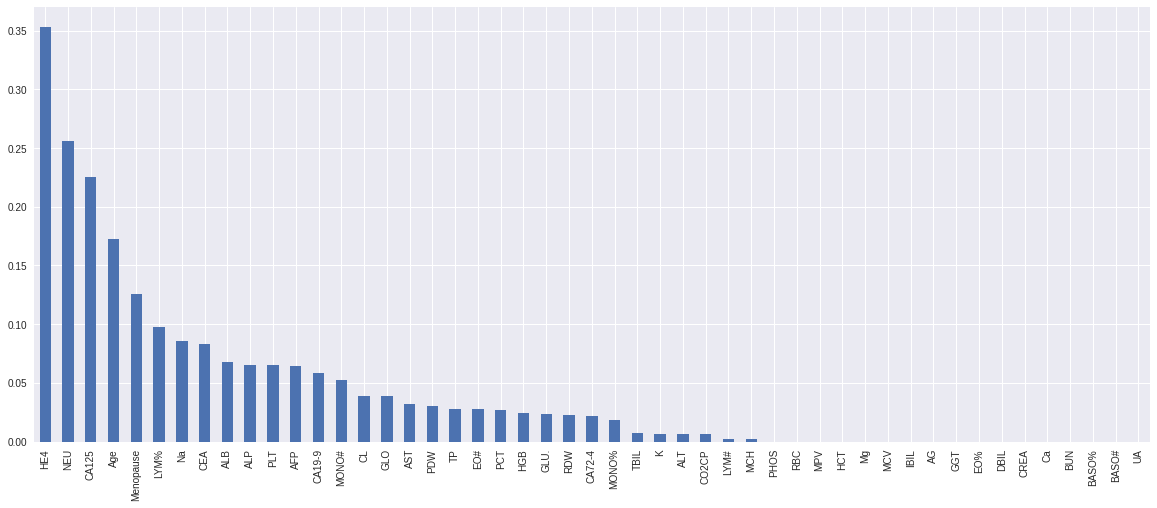

In [41]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()] 

Index(['AFP', 'Age', 'ALB', 'ALP', 'CA125', 'CA19-9', 'CEA', 'HE4', 'LYM%',
       'Menopause', 'Na', 'NEU', 'PCT', 'PDW', 'PLT'],
      dtype='object')

In [42]:
X_train=X_train[['HE4', 'NEU', 'CA125', 'Age', 'CEA', 'LYM%', 'Menopause', 'Na', 'ALB', 'PLT', 'ALP', 'MONO#', 'AFP', 'CA19-9', 'CL','RDW','MCH','MONO%','GLO','PCT','TBIL','PDW','CA72-4','TP','HGB']]



In [43]:
X_test=X_test[['HE4', 'NEU', 'CA125', 'Age', 'CEA', 'LYM%', 'Menopause', 'Na', 'ALB', 'PLT', 'ALP', 'MONO#', 'AFP', 'CA19-9', 'CL','RDW','MCH','MONO%','GLO','PCT','TBIL','PDW','CA72-4','TP','HGB']]

X_test.head()

,HE4,NEU,CA125,Age,CEA,LYM%,Menopause,Na,ALB,PLT,...,RDW,MCH,MONO%,GLO,PCT,TBIL,PDW,CA72-4,TP,HGB
192,36.81,76.0,29.85,30,1.54,16.3,0,142.3,41.6,272,...,15.8,29.1,6.24,24.6,0.184,12.2,16.5,1.56,66.2,118.0
256,46.58,50.3,21.94,44,1.20,39.0,0,141.7,43.1,299,...,13.2,28.1,4.90,29.3,0.340,17.7,13.5,10.17,72.4,128.0
169,1309.00,77.7,2154.00,42,0.80,17.4,0,140.5,39.1,284,...,15.0,27.1,4.30,26.2,0.320,14.6,14.5,10.17,65.3,147.0
67,183.94,76.8,2741.00,69,0.55,16.1,1,145.2,31.6,309,...,12.3,28.5,6.30,32.4,0.320,5.2,11.5,10.17,64.0,125.0
201,56.91,49.1,43.41,20,0.59,37.5,0,139.1,32.6,340,...,13.3,24.0,8.10,31.1,0.360,2.7,12.3,10.17,63.7,109.0


In [44]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = pd.DataFrame(X_train).corr()
corr.style.background_gradient(cmap='coolwarm')

,HE4,NEU,CA125,Age,CEA,LYM%,Menopause,Na,ALB,PLT,ALP,MONO#,AFP,CA19-9,CL,RDW,MCH,MONO%,GLO,PCT,TBIL,PDW,CA72-4,TP,HGB
HE4,1.000000,0.335655,0.493524,0.347785,-0.037192,-0.322836,0.339304,-0.048854,-0.408089,0.352219,0.159213,0.239007,0.008041,-0.015610,-0.088238,0.055639,-0.059263,0.102779,0.018875,0.181564,-0.176645,0.054847,0.274368,-0.303494,-0.176600
NEU,0.335655,1.000000,0.285135,0.334217,0.029920,-0.844152,0.272583,-0.094706,-0.324088,0.297520,0.148732,0.263557,0.174113,0.096459,-0.126083,-0.088069,-0.002304,-0.266181,-0.056793,0.318000,-0.017286,-0.194771,0.170924,-0.303356,-0.130145
CA125,0.493524,0.285135,1.000000,0.337606,0.008947,-0.242791,0.347250,0.015704,-0.253411,0.302654,0.154864,0.143693,0.065836,0.207773,-0.155431,0.090537,-0.048106,0.000681,0.090082,0.212486,-0.140950,0.014343,0.444504,-0.143370,0.008867
Age,0.347785,0.334217,0.337606,1.000000,0.006057,-0.277473,0.801124,0.176545,-0.275818,0.149155,0.346890,0.178716,-0.044383,0.103946,0.094214,-0.003803,0.005633,0.067079,0.084338,0.164929,-0.005145,-0.071357,0.100163,-0.151096,-0.077174
CEA,-0.037192,0.029920,0.008947,0.006057,1.000000,-0.046055,-0.008409,-0.109750,-0.116937,-0.019155,0.334997,0.044782,0.013060,0.303885,-0.055765,0.007442,-0.002823,0.154106,0.029078,-0.044125,0.102091,-0.005708,0.136398,-0.180554,-0.068858
LYM%,-0.322836,-0.844152,-0.242791,-0.277473,-0.046055,1.000000,-0.210089,0.126011,0.368399,-0.244080,-0.130994,-0.361385,-0.147403,-0.108600,0.076439,0.055469,0.004895,0.195195,0.032661,-0.242290,0.036245,0.123894,-0.154503,0.325475,0.205295
Menopause,0.339304,0.272583,0.347250,0.801124,-0.008409,-0.210089,1.000000,0.226483,-0.179361,0.131986,0.363574,0.116464,-0.071495,0.079895,0.053574,-0.163552,0.096625,0.009957,0.058541,0.110367,-0.005114,-0.070916,0.175399,-0.076372,0.023355
Na,-0.048854,-0.094706,0.015704,0.176545,-0.109750,0.126011,0.226483,1.000000,0.244222,-0.133814,0.159685,-0.160024,-0.144312,-0.194810,0.369292,-0.236006,0.068103,-0.103105,-0.024669,0.026038,-0.109168,-0.172574,0.001023,0.262899,0.085616
ALB,-0.408089,-0.324088,-0.253411,-0.275818,-0.116937,0.368399,-0.179361,0.244222,1.000000,-0.372187,-0.042766,-0.414991,-0.144226,-0.099264,0.104454,-0.125780,0.128118,-0.235531,-0.052599,-0.243338,0.319238,-0.062872,-0.134155,0.771055,0.386761
PLT,0.352219,0.297520,0.302654,0.149155,-0.019155,-0.244080,0.131986,-0.133814,-0.372187,1.000000,0.169450,0.317603,0.106159,0.039337,-0.291839,0.205465,-0.313682,0.053684,0.265660,0.849772,-0.237867,-0.239812,0.150013,-0.122803,-0.154786


# ***Feature Scaling***

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print(X_train)

[[-0.37412506  0.00619545 -0.40205538 ... -0.00612426  0.93395688
   0.36546244]
 [ 0.07758872  1.88440908  0.04230901 ... -0.00612426 -0.51697453
  -0.12454307]
 [ 2.19757598  1.42305748  0.6597819  ... -0.00612426 -2.15426411
  -0.18579376]
 ...
 [-0.00701354  0.78741749 -0.35036748 ... -0.00612426  0.98720207
  -0.92080202]
 [-0.35276688 -0.68890763 -0.39440527 ... -0.31348993  0.21514683
  -0.12454307]
 [ 2.0820913  -0.93496182  1.14846971 ... -0.00612426 -0.53028583
   0.73296658]]


In [46]:
print(X_test)

[[-0.39548323  0.97195813 -0.40409209 ... -0.56444038 -0.62346491
  -0.43079651]
 [-0.37012851 -1.66287212 -0.41391553 ... -0.00612426  0.20183553
   0.18171038]
 [ 2.90605501  1.14624652  2.23389068 ... -0.00612426 -0.74326658
   1.34547347]
 ...
 [-0.33667688  0.00619545 -0.41515743 ... -0.00612426 -0.22412599
   0.30421175]
 [-0.01365715 -2.07296243 -0.39700084 ... -0.00612426 -0.55690842
  -0.24704445]
 [-0.40428083  0.00619545 -0.38347655 ... -0.00612426 -0.30399377
   0.18171038]]


# ***RANDOM FORESTS***

In [47]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
%matplotlib inline

In [48]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

m_best = CV_rfc.best_estimator_

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

In [50]:
test_acc = accuracy_score(y_test, y_pred) 
print(accuracy_score(y_test,y_pred)) 
print(precision_score(y_test,y_pred)) 
print(f1_score(y_test, y_pred))  
print(recall_score(y_test,y_pred))


print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred)) 
print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
'''print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)'''
    
pred_prob3 = m_best.predict_proba(X_test) 
print(classification_report(y_test,y_pred))

0.9
0.8974358974358975
0.9090909090909091
0.9210526315789473
Training confusion matrix
[[129  10]
 [  0 140]]
Testing confusion matrix
[[28  4]
 [ 3 35]]
Train accuracy: 0.9642
Test accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.90      0.92      0.91        38

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



# ***Logistic Regression***

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
model_lr = GridSearchCV(lr, param_grid=grid_values)

model_lr.fit(X_train,y_train)

m_best = model_lr.best_estimator_

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test) 
print(y_pred) 



test_acc = accuracy_score(y_test, y_pred) 
print(accuracy_score(y_test,y_pred)) 
print(metrics.precision_score(y_test,y_pred)) 
print(metrics.recall_score(y_test,y_pred))
print(metrics.f1_score(y_test, y_pred))  



print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))


    
pred_prob5 = m_best.predict_proba(X_test)  
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[1 1 0 ... 1 0 1]
0.8428571428571429
0.8292682926829268
0.8947368421052632
0.860759493670886
Training confusion matrix
[[122  17]
 [  4 136]]
Testing confusion matrix
[[25  7]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.83      0.89      0.86        38

    accuracy                           0.84        70
   macro avg       0.85      0.84      0.84        70
weighted avg       0.84      0.84      0.84        70



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = m_best.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9177631578947368

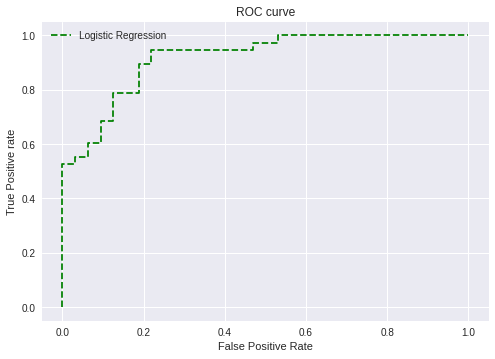

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=75a8ada9d511cd9bff34f7be79cfaf7089b82c326df99e30c46a686c7969b45c
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
pip install sklearn.ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble


# ***ADABOOST***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_Adaboost=AdaBoostClassifier()

In [ ]:
params={ 'learning_rate': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
    
    "random_state": np.arange(0,100,1)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_Adaboost,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0, 10.0, 100.0,
                                                          1000.0],
                                        'random_state': array([ 0,  1,  2, ..., 97, 98, 99])},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

AdaBoostClassifier(learning_rate=0.1, random_state=27)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_Adaboost=AdaBoostClassifier(learning_rate=0.1, random_state=3)
classifier_Adaboost.fit(X_train,y_train)
y_pred=classifier_Adaboost.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model:",acc) 
print()

[[29  3]
 [ 4 34]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.92      0.89      0.91        38

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70

Accuracy of the model: 0.9



### ***XGBOOST***

In [58]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 4,
    verbose=True
)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

m_best = grid_search.best_estimator_

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc)) 
print(accuracy_score(y_test,y_pred))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))
print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)

pred_prob2 = m_best.predict_proba(X_test) 

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(y_test,y_pred))

Fitting 4 folds for each of 96 candidates, totalling 384 fits
Train accuracy: 1.0000
Test accuracy: 0.9000
0.9
Precision: 0.9189
Recall: 0.8947
F1: 0.9067
AUC: 0.9005
Log Loss: 3.6044
Training confusion matrix
[[139   0]
 [  0 140]]
Testing confusion matrix
[[29  3]
 [ 4 34]]
Feature Importance
0.33983567
0.04938589
0.028988715
0.022677787
0.09925017
0.025802953
0.0
0.027582368
0.020735694
0.018629165
0.015348941
0.0
0.022122514
0.031982362
0.026806643
0.019031195
0.016759427
0.019779488
0.064872056
0.03513432
0.012201508
0.024491439
0.023486016
0.02946342
0.025632294
[[29  3]
 [ 4 34]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.92      0.89      0.91        38

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



## ***GRADIENT BOOSTING MACHINE***

In [53]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import metrics 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from matplotlib import pyplot


In [55]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)

baseline.fit(X_train, y_train)

gbm_predict_train = baseline.predict(X_train)

#get accuracy
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

#print accuracy
print ("GBM training Accuracy: {0:.4f}".format(gbm_accuracy))

gbm_predict_test = baseline.predict(X_test)

#get accuracy
gbm_accuracy_testdata = metrics.accuracy_score(y_test, gbm_predict_test)

#print accuracy
print ("GBM testing Accuracy: {0:.4f}".format(gbm_accuracy_testdata))

from sklearn.metrics import log_loss
logloss = log_loss(y_test, gbm_predict_test)
print ("GBM Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, gbm_predict_test)
print ("GBM AUC: {0:.4f}".format(auc)) 
print(metrics.precision_score(y_test,y_pred)) 
print(metrics.recall_score(y_test,y_pred))
print(metrics.f1_score(y_test, y_pred))  



#print('Training confusion matrix')
#print(confusion_matrix(y_train, gbm_predict_train))
#print('Testing confusion matrix')
#print(confusion_matrix(y_test, gbm_predict_test))

#print ("Confusion Matrix for GBM")

# labels for set 1=True to upper left and 0 = False to lower right
#print ("{0}".format(metrics.confusion_matrix(y_test, gbm_predict_test, labels=[1, 0])))

#print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, gbm_predict_test, labels=[1, 0])))


GBM training Accuracy: 1.0000
GBM testing Accuracy: 0.8571
GBM Log Loss: 5.1491
GBM AUC: 0.8586
0.8292682926829268
0.8947368421052632
0.860759493670886
Classification Report

              precision    recall  f1-score   support

           1       0.89      0.84      0.86        38
           0       0.82      0.88      0.85        32

    accuracy                           0.86        70
   macro avg       0.86      0.86      0.86        70
weighted avg       0.86      0.86      0.86        70



## ***LIGHT GRADIENT BOOSTING***

In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics


In [ ]:
params = {
    'application': 'binary', 
    'boosting': 'gbdt', 
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', 
    'max_depth': -1, 
    'max_bin': 510, 
    'lambda_l1': 5, 
    'lambda_l2': 10, 
    'metric' : 'binary_error',
    'subsample_for_bin': 200, 
    'subsample': 1,
    'colsample_bytree': 0.8,
    'min_split_gain': 0.5, 
    'min_child_weight': 1, 
    'min_child_samples': 5
}

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin'])

In [ ]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt', 'dart'], 
    'objective' : ['binary'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(mdl, gridParams, verbose=1, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_bin=510, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_jobs=5, objective='binary', subsample=1,
                                      subsample_for_bin=200),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.64, 0.65, 0.66],
                         'learning_rate': [0.005, 0.01], 'max_bin': [255, 510],
                         'n_estimators': [8, 16, 24],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
                         'random_state': [500], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.7, 0.75]},
             verbose=1)

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test) 

watchlist = [d_train, d_test]

model = lgb.train(params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=50, verbose_eval=4)

y_t = model.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

test_acc = metrics.accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss)) 
print (metrics.classification_report(y_test, y_pred))


/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[4]	training's binary_error: 0.0896057	valid_1's binary_error: 0.128571
[8]	training's binary_error: 0.0896057	valid_1's binary_error: 0.128571
[12]	training's binary_error: 0.0896057	valid_1's binary_error: 0.128571
[16]	training's binary_error: 0.0716846	valid_1's binary_error: 0.128571
[20]	training's binary_error: 0.0645161	valid_1's binary_error: 0.128571
[24]	training's binary_error: 0.0645161	valid_1's binary_error: 0.128571
[28]	training's binary_error: 0.0681004	valid_1's binary_error: 0.128571
[32]	training's binary_error: 0.0645161	valid_1's binary_error: 0.128571
[36]	training's binary_error: 0.0645161	valid_1's binary_error: 0.128571
[40]	training's binary_error: 0.0645161	valid_1's binary_error: 0.128571
[44]	training's binary_error: 0.0645161	valid_1's binary_error: 0.128571
[48]	training's binary_error: 0.0645161	valid_1's binary_error: 0.128571
[52]	training's binary_error: 0.0681004	valid_1's binary_error: 

# ***Voting Classifier***

####Hard Voting

In [ ]:
estimator = []
estimator.append(('LR', LogisticRegression(random_state=1)))
estimator.append(('GBC', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)))
estimator.append(('XGB', XGBClassifier()))
estimator.append(('LGBM', lgb.LGBMClassifier())) 
#estimator.append(('ADB', AdaBoostClassifier()))
estimator.append(('RF', RandomForestClassifier(n_estimators = 1000, random_state = 42)))

In [ ]:
from sklearn.ensemble import VotingClassifier
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred)) 
print(metrics.precision_score(y_test,y_pred)) 
print(metrics.f1_score(y_test, y_pred))  



0.8857142857142857
0.8947368421052632
0.8947368421052632


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.89      0.89      0.89        38

    accuracy                           0.89        70
   macro avg       0.88      0.88      0.88        70
weighted avg       0.89      0.89      0.89        70



<AxesSubplot:>

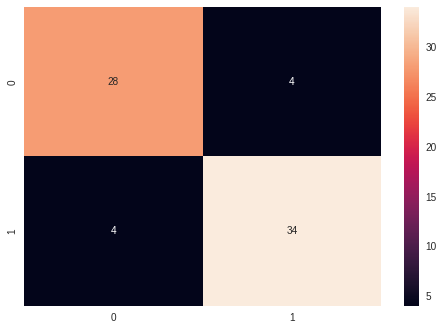

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19879 sha256=8a033f2dccf9ec78f06c9495f6731f7e55f1921a58d354385c0a26658cfeef29
  Stored in directory: /root/.cache/pip/wheels/17/89/0b/21d5484cbf713c95b641ec1bdc40dd7ae798cbdea2337e3535
Successfully built vecstack
